## cluster

In [1]:
from facenet_pytorch import MTCNN
import torch
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from models import FaceNetModel, model_921


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

imagePaths='/home/jupyter/data/face-image/training_aihub_sample/'
# imagePaths='./datasets/train_소녀시대/'
# imagePaths='./datasets/test_images/'

model = model_921().to(device)
# model = FaceNetModel().to(device)
# state = torch.load('./log/best_state.pth')
# model.load_state_dict(state["state_dict"])

# mtcnn = MTCNN(keep_all=True, device=device)
mtcnn = MTCNN(
    image_size=224, margin=0, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True,
    device=device
)

Running on device: cuda:0


/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [4]:
# 바운딩 박스 반환을 위한 함수
def mtcnn_detect(img: np.ndarray) -> np.ndarray:
    boxes, probs = mtcnn.detect(img)
    box_pred=[]
    if boxes is None :
        return box_pred
    for box in boxes:
        x_left = min(box[0], box[2])
        x_right = max(box[0], box[2])
        y_left = min(box[1], box[3])
        y_right = max(box[1], box[3])
        box_area = abs(x_right-x_left)*(y_right-y_left)
        # print(box_area)
        # if box_area<5000:
        #     continue
        # 사진에 바운딩 박스 그리기
        img = cv2.rectangle(img, (int(x_left), int(y_left)), (int(x_right), int(y_right)), 
                            (255, 0, 0),3)
        # 좌표저장
        box_=list([x_left,y_left,x_right,y_right])
        box_pred.append(box_)
    # plt.imshow(img)
    # plt.show()
    return box_pred

In [9]:
# 라벨리스트 만들기
from pathlib import Path
data_root = Path(imagePaths)
class_to_label={}

label=[]
for idx, name_file in enumerate(os.listdir(imagePaths)):
	name_path = data_root / name_file

	class_to_label[name_file]=idx
	
	for i, img_file in enumerate(os.listdir(name_path)):
		label.append(class_to_label[name_file])
		full_file_path = str(name_path / img_file)
		
# print(class_to_label)

In [21]:
label[51]

0

In [6]:
# AI hub data 확인
from pathlib import Path
imagePaths='/home/jupyter/data/face-image/training_aihub_sample/'
data_root = Path(imagePaths)

for name_file in os.listdir(imagePaths):
    name_path = data_root / name_file
    for i, img_file in enumerate(os.listdir(name_path)):
        full_file_path = str(name_path / img_file)
        img = Image.open(full_file_path)
        # plt.imshow(img)
        # plt.show()
        print(i)
    break

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51


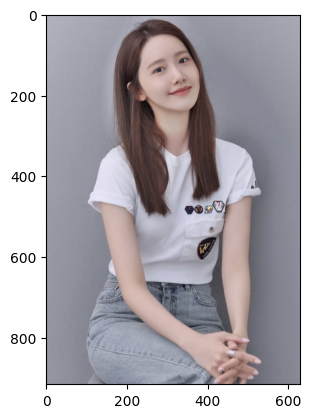

In [70]:
# 소녀시대 data 확인
from pathlib import Path
data_root = Path(imagePaths)

for i, img_file in enumerate(os.listdir(imagePaths)):
    img = Image.open(imagePaths+'/'+img_file)
    plt.imshow(img)
    break

In [5]:
# aihub_sample
from pathlib import Path
data=[]
data_root = Path(imagePaths)
class_to_label={}
label=[]
for idx, name_file in enumerate(os.listdir(imagePaths)):
	name_path = data_root / name_file
	
	class_to_label[name_file]=idx
	
	for i, img_file in enumerate(os.listdir(name_path)):
		full_file_path = str(name_path / img_file)
		# print("[INFO] processing image {}/{}".format(i+1,len(full_file_path)),end='\r')
		
		img = Image.open(full_file_path)

		img = np.array(img)
		
		# 인물의 얼굴을 좌표로 반환. (top, right, bottom, left)

		boxes = mtcnn_detect(img)
		# print(boxes)
		x_test = mtcnn(img)
		x_aligned=[]
		x_aligned.append(x_test)
		try:
			aligned = torch.stack(x_aligned).to(device)
			label.append(class_to_label[name_file])
		except TypeError:
			print(f"{full_file_path}에서 얼굴을 인식하지 못함")
		else :
			embeddings = model(aligned).detach().cpu()
			# print(boxes)
			d = [{"imagePath": imagePaths, "loc": box, "encoding": enc}
				for (box, enc) in zip(boxes, embeddings)]
			data.extend(d)
			# break


/home/jupyter/data/face-image/training_aihub_sample/F0003-M/face_M_F0003_IND_M_39_-90_04.jpg에서 얼굴을 인식하지 못함
/home/jupyter/data/face-image/training_aihub_sample/F0003-GM/face_GM_F0003_IND_GM_68_-90_03.jpg에서 얼굴을 인식하지 못함
/home/jupyter/data/face-image/training_aihub_sample/F0001-D/face_D_F0001_IND_D_18_-90_04.jpg에서 얼굴을 인식하지 못함
/home/jupyter/data/face-image/training_aihub_sample/F0001-D/face_D_F0001_IND_D_18_90_04.jpg에서 얼굴을 인식하지 못함


In [1]:
data

NameError: name 'data' is not defined

In [6]:
encodings = [d["encoding"] for d in data]

encoding_new = []
for i, e in enumerate(encodings):
    encoding_new.append(np.array(e))
print("shape: ", np.array(encoding_new).shape)


shape:  (289, 128)


In [7]:
from sklearn.cluster import DBSCAN, KMeans
from collections import Counter

print("[INFO] clustering...")
# clt = DBSCAN(metric="euclidean", n_jobs=4)
clt = KMeans(n_clusters=6)
clt.fit(encoding_new)
print(clt.labels_)
labelIDs = np.unique(clt.labels_)

numUniqueFaces = len(np.where(labelIDs > -1)[0])
print("[INFO] # unique faces: {}".format(numUniqueFaces))
print("군집 별 개수:", Counter(clt.labels_))

[INFO] clustering...
[3 2 0 2 5 2 2 2 0 2 0 0 5 0 0 5 2 2 2 2 2 0 2 1 0 5 4 5 5 2 2 4 0 2 2 0 2
 5 4 2 0 5 5 2 0 2 2 2 2 2 1 0 0 0 1 4 3 1 4 1 0 3 5 2 1 4 3 1 0 5 5 0 0 5
 3 1 1 2 4 5 2 1 2 0 2 1 5 0 1 3 5 1 5 5 3 3 0 2 0 3 0 0 2 2 4 1 2 2 2 3 2
 4 4 0 1 3 5 2 2 5 0 1 0 5 2 0 2 0 2 2 4 2 0 2 0 5 2 0 2 0 0 2 5 0 0 2 1 5
 3 4 4 5 1 4 2 1 0 5 3 2 3 4 4 4 0 1 5 2 4 0 1 1 4 1 4 3 2 0 4 3 3 4 1 3 4
 3 2 3 1 3 2 2 0 5 5 0 2 5 2 2 2 2 5 4 0 5 2 2 4 0 4 2 4 0 4 2 1 0 0 0 5 0
 0 4 4 4 1 0 5 2 2 0 0 1 2 2 2 2 2 2 2 1 0 0 2 1 2 0 0 2 2 2 2 5 2 0 4 2 2
 0 0 2 0 5 4 2 0 2 0 5 0 1 2 0 0 2 1 2 1 0 5 2 0 2 2 2 0 4 0]
[INFO] # unique faces: 6
군집 별 개수: Counter({2: 92, 0: 71, 5: 38, 4: 34, 1: 33, 3: 21})


In [28]:
# len(clt.labels_)
len(label)

289

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(label,clt.labels_)

0.2179930795847751

In [20]:
import torch
torch.cuda.empty_cache()